## Importing the required libraries...

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [87]:
df = pd.read_csv("C:\\Users\\Nilesh\\Documents\\CSV\\cubic_zirconia.csv")

In [88]:
df.shape

(26967, 11)

In [89]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### Summary of the dataset

In [90]:
df.describe(include = 'all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


From the above summary we can see that there are some records where the dimensions of the Zirconia cuboid are 0.00 which isnt possible, this indicates that there are some records with incomplete or wrong data


So removing these records would be better since they will only hinder the accuracy for the machine learning model and provide wrong insights in graphs

We can also notice that the value max value of Y and Z dimensions are far greater than mean values, indicating a possibility of an outlier

## Data cleaning 

###### Removing the records where either dimension is zero

In [91]:
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [92]:
df.drop((df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]).index, axis = 0, inplace = True)

###### Removing the unnecessary index column

In [93]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

###### Checking for null values if any...

In [94]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

###### Since this is large dataset dropping small amount of null rows wont matter much...

In [95]:
df.dropna(inplace = True)

###### Checking for duplicates and removing them

In [96]:
df.duplicated().sum()

33

In [97]:
df.drop_duplicates(inplace = True)

In [98]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [99]:
df.reset_index(inplace = True, drop = True)

In [100]:
df.shape

(26228, 10)

## EDA

In [101]:
df.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.300000,Ideal,E,SI1,62.100000,58.000000,4.270000,4.290000,2.660000,499
1,0.330000,Premium,G,IF,60.800000,58.000000,4.420000,4.460000,2.700000,984
2,0.900000,Very Good,E,VVS2,62.200000,60.000000,6.040000,6.120000,3.780000,6289
3,0.420000,Ideal,F,VS1,61.600000,56.000000,4.820000,4.800000,2.960000,1082
4,0.310000,Ideal,F,VVS1,60.400000,59.000000,4.350000,4.430000,2.650000,779


#### Basic summary of the dataset

In [102]:
df.describe().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,carat,depth,table,x,y,z,price
count,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000,26228.000000
mean,0.797425,61.745573,57.455216,5.728685,5.732539,3.537417,3934.616288
std,0.476534,1.411824,2.230013,1.125010,1.164034,0.695979,4018.196388
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5355.250000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


### Univariate Analysis

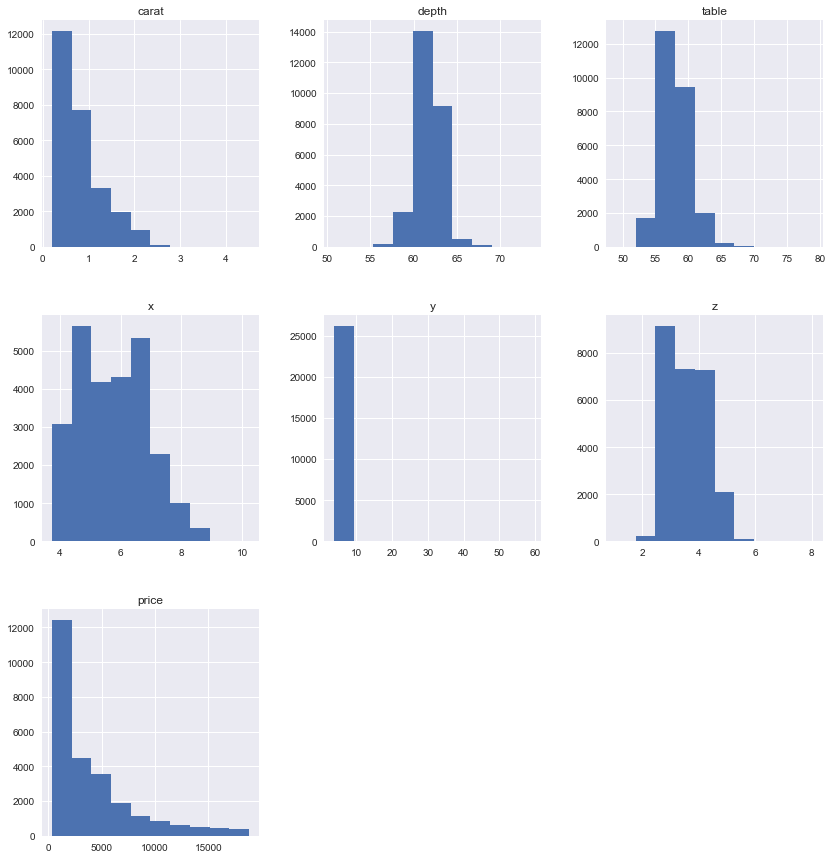

In [103]:
df.hist(figsize = (14,15))
plt.show()

### Bivariate Analysis

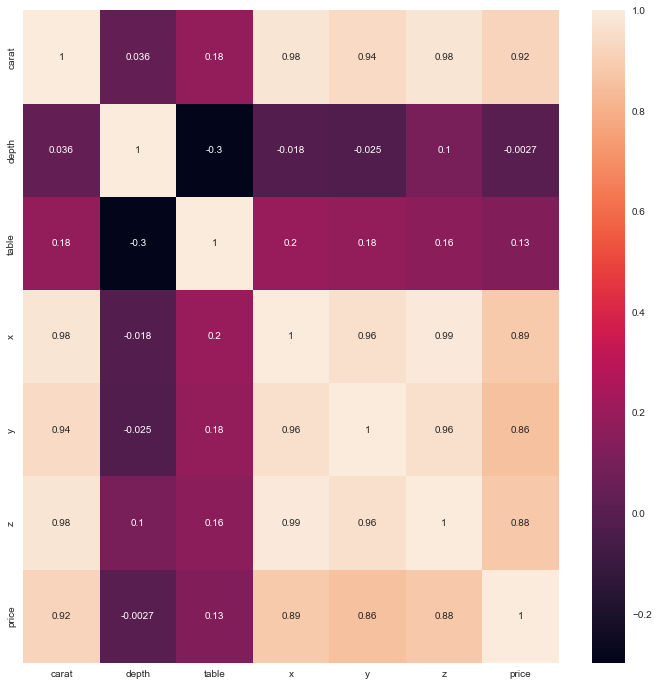

In [104]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Defining a column size using the x, y and z dimensions

In [105]:
df['sizes'] = df['x'] * df['y'] * df['z']

#### Checking if there are any relations between zirconium's price and other factors like its size, color, cut or clarity

In [106]:
color = df.groupby('color')['price'].mean().sort_values(ascending = False)
color

color
J    5305.303290
I    5134.026217
H    4465.062312
G    4011.145524
F    3692.093594
D    3186.034609
E    3080.865818
Name: price, dtype: float64

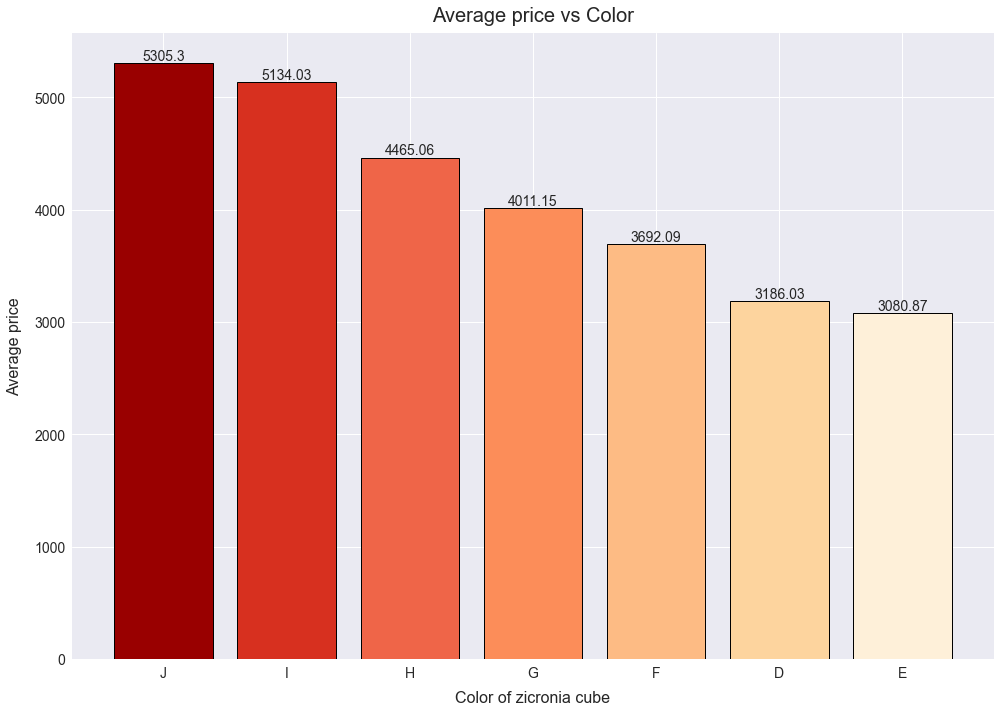

In [107]:
cp = list(reversed(['#fef0d9','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#990000']))

plt.figure(figsize = (14,10))
plt.style.use('seaborn')

plt.bar(color.index, color, edgecolor = 'k', linewidth = 1,
        color = cp)
for i in range(len(color)):
    plt.text(i, color[i], float("{:.2f}".format(color[i])), horizontalalignment = 'center', 
             verticalalignment = 'bottom', size = 14)
    
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel("Color of zicronia cube", size = 16, labelpad= 10)
plt.ylabel("Average price", size = 16, labelpad= 12)
plt.title("Average price vs Color", size = 20, pad= 12)

plt.tight_layout()
plt.show()

###### Insights: The cubic zirconias with color "J" have the highest average price of 5307.16. <br><br>Followed by the zirconias with color "I" and "H" with an average price of 5139.2 and 4474.12 respectively

In [108]:
clarity = df.groupby('clarity')['price'].mean().sort_values(ascending = False)
clarity

clarity
SI2     5073.681931
SI1     4008.490548
VS2     3953.283204
I1      3917.968750
VS1     3842.090361
VVS2    3273.647296
IF      2754.876005
VVS1    2486.877722
Name: price, dtype: float64

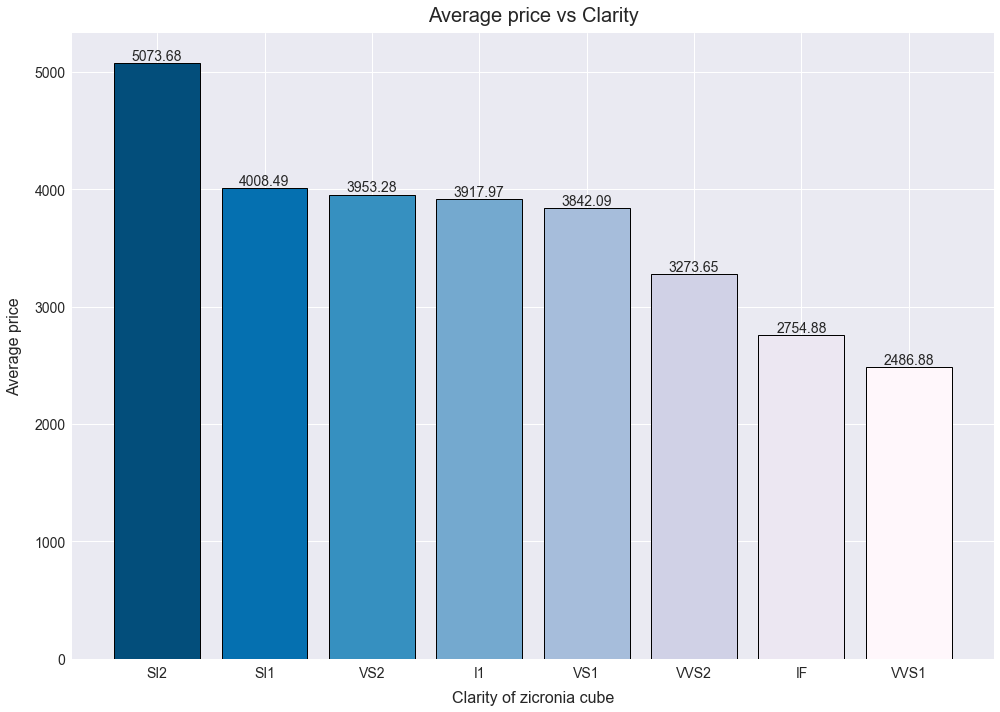

In [109]:
cp = list(reversed(['#fff7fb','#ece7f2','#d0d1e6','#a6bddb','#74a9cf','#3690c0','#0570b0','#034e7b']))
plt.figure(figsize = (14,10))
plt.style.use('seaborn')

plt.bar(clarity.index, clarity, edgecolor = 'k', color = cp, linewidth = 1)
for i in range(len(clarity)):
    plt.text(i, clarity[i], float("{:.2f}".format(clarity[i])), horizontalalignment = 'center', 
             verticalalignment = 'bottom', size = 14)
    
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel("Clarity of zicronia cube", size = 16, labelpad= 10)
plt.ylabel("Average price", size = 16, labelpad= 12)
plt.title("Average price vs Clarity", size = 20, pad= 12)

plt.tight_layout()
plt.show()

###### Insights: <br><br>i. From the above graph we can see that the clarity of the Zirconia crystal has a huge impact on its price.<br><br>ii. The Zirconia with highest clarity "SI2" has the highest average price of 5073.68, followed by "SI1" and "VS2" with average prices of 4008.49 and 3953.28 respectively<br><br>iii. The highest average price of Zirconia of clarity "S12" is almost 2 times the price of the Zirconia with clarity of "WS1"

In [110]:
cut = df.groupby('cut')['price'].mean().sort_values(ascending = False)
cut

cut
Fair         4545.401325
Premium      4535.745963
Very Good    4029.336681
Good         3948.939789
Ideal        3453.173612
Name: price, dtype: float64

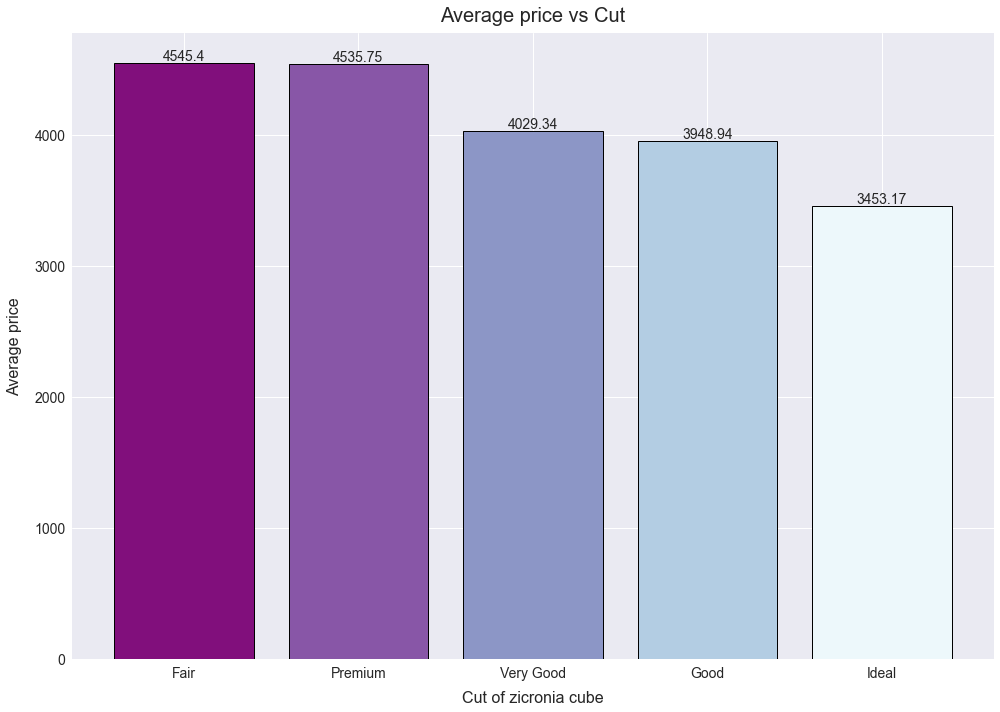

In [111]:
cp = list(reversed(['#edf8fb','#b3cde3','#8c96c6','#8856a7','#810f7c']))

plt.figure(figsize = (14,10))
plt.style.use('seaborn')

plt.bar(cut.index, cut, edgecolor = 'k', linewidth = 1, color = cp)
for i in range(len(cut)):
    plt.text(i, cut[i], float("{:.2f}".format(cut[i])), horizontalalignment = 'center', 
             verticalalignment = 'bottom', size = 14)
    
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel("Cut of zicronia cube", size = 16, labelpad= 10)
plt.ylabel("Average price", size = 16, labelpad= 12)
plt.title("Average price vs Cut", size = 20, pad= 12)

plt.tight_layout()
plt.show()

###### Insights: <br><br>i. From the graph it can be seen that cut type also has an impact on the price of Zirconia. Zirconia with Fair cut has the highest average price followed by Premium and Very Good<br><br>ii. Zirconia with an Fair cut has the highest average price of 4545.4 followed very closely by premium cut Zirconias having an average price of 4535.75 even for the second highest, Premium cut. 

In [112]:
df.sort_values(by = 'sizes')

,carat,cut,color,clarity,depth,table,x,y,z,price,sizes
12684,0.20,Premium,F,VS2,62.6,59.0,3.73,3.71,2.33,367,32.243239
24801,0.20,Premium,E,VS2,59.0,60.0,3.81,3.78,2.24,367,32.260032
12391,0.20,Premium,E,VS2,59.8,62.0,3.79,3.77,2.26,367,32.291558
18585,0.20,Premium,D,VS2,61.7,60.0,3.77,3.72,2.31,367,32.396364
5638,0.20,Very Good,E,VS2,63.4,59.0,3.74,3.71,2.36,367,32.745944
...,...,...,...,...,...,...,...,...,...,...,...
2935,4.01,Premium,J,I1,62.5,62.0,10.02,9.94,6.24,15223,621.496512
7938,4.00,Very Good,I,I1,63.3,58.0,10.01,9.94,6.31,15984,627.841214
19951,4.01,Premium,I,I1,61.0,61.0,10.14,10.10,6.17,15223,631.894380
12148,4.50,Fair,J,I1,65.8,58.0,10.23,10.16,6.72,18531,698.455296


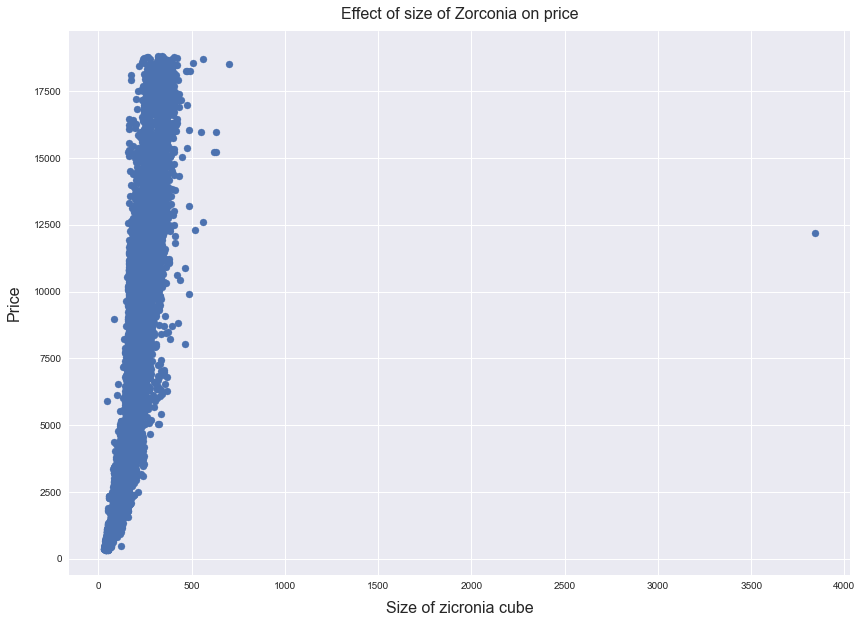

In [113]:
plt.figure(figsize =(14,10))
plt.scatter(df.sizes, df.price)

plt.xlabel("Size of zicronia cube", size = 16, labelpad= 10)
plt.ylabel("Price", size = 16, labelpad= 12)
plt.title("Effect of size of Zorconia on price", size = 16, pad= 12)

plt.show() 

We have an outlier previously seen in the summary of the data


There are multiple ways to deal with an outlier, but this just seems like an error and there is only one data point, so removing it is the best choice

In [114]:
df[df['sizes'] > 1000]

,carat,cut,color,clarity,depth,table,x,y,z,price,sizes
25085,2.0,Premium,H,SI2,58.9,57.0,8.09,58.9,8.06,12210,3840.59806


In [115]:
df.drop(df[df['sizes'] > 1000].index, axis = 0, inplace = True)

In [116]:
df.reset_index(inplace = True, drop = True)

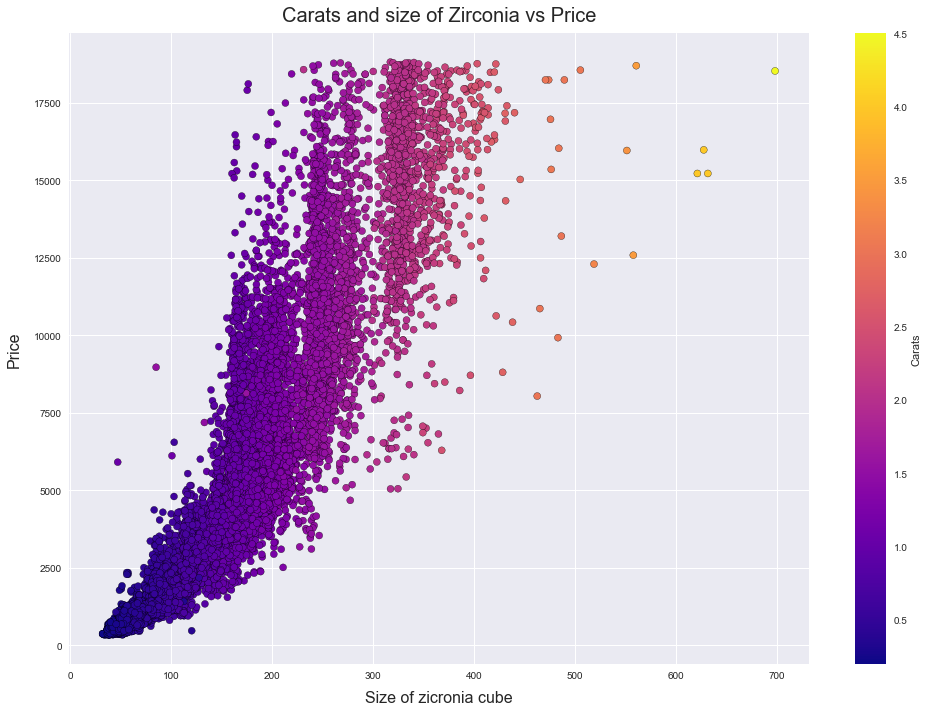

In [117]:
plt.figure(figsize =(14,10))

plt.scatter(df.sizes, df.price, c = df.carat, cmap = 'plasma', edgecolor = 'k')
plt.colorbar(label = 'Carats', orientation = 'vertical')

plt.xlabel("Size of zicronia cube", size = 16, labelpad= 10)
plt.ylabel("Price", size = 16, labelpad= 12)
plt.title("Carats and size of Zirconia vs Price", size = 20, pad= 12)

plt.tight_layout()
plt.show()

###### Insights: i. From the scatter graph above we can come to a conclusion that the size of the cube and the price of the cube are directly proportional<br><br>ii. We can also notice that the price increases with an increase in carats

Text(0.5, 1.0, 'Carats and size of Zirconia vs Price')

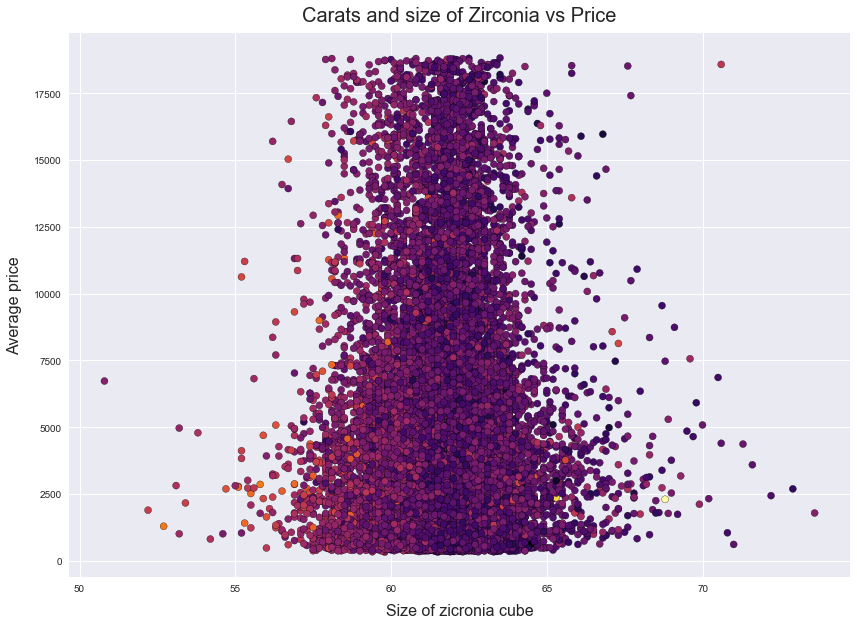

In [118]:
plt.figure(figsize =(14,10))

plt.scatter(df.depth, df.price, c = df.table, cmap = 'inferno', edgecolor = 'black')

plt.xlabel("Size of zicronia cube", size = 16, labelpad= 10)
plt.ylabel("Average price", size = 16, labelpad= 12)
plt.title("Carats and size of Zirconia vs Price", size = 20, pad= 12)

There doesnt seem to be a relationship between the price and depth or table

## Applyling Linear Regression

In [119]:
df1 = pd.get_dummies(df, columns = ['cut', 'color', 'clarity'])

In [120]:
df1.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'sizes', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [121]:
x = df1.drop(['price', 'depth', 'table'], axis = 1)
y = df1.price

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=69)

In [123]:
model = LinearRegression()

In [124]:
model.fit(X_train, y_train)

LinearRegression()

In [125]:
model.score(X_test, y_test)

0.9253950026659158

In [126]:
model.intercept_

1179.1632138089308

## Final conclusion

###### 1. The factors such as carat, color, cut, clarity and the dimensions play a big role in determining the price of the Zirconia cube.<br><br>   2. The factors such as carats and it's dimensions are directly proportional to the price of the cuboid<br><br>   3. Zicronia cubes with the color "J" are likely to be sold at higher prices followed by color 'I' and color 'H' given that all other factors remain constant<br><br>   4. For cut the ideal choices for higher prices are Zicronias with Fair or Premium Cut followed by Very Good cut<br><br>   5. Zicronias with a clarity of 'SI2' will get sold for a higher price compared to zicronias of other clarity given that all other factors remain constant<br><br>   6. The depth and the table doesnt seem to have much effect on the price of a Zicronia<br><br>   So in order to be more profitable an ideal Zicronia cube would be the one with high carat value and dimension as much as possible with color of 'J' having clarity rated 'SI2' and cut which is either 'Fair' or 'Premium'